<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')
'''
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 2
plt.rcParams['grid.color'] = "#cccccc"
'''

'\nplt.rcParams[\'axes.facecolor\'] = \'white\'\nplt.rcParams[\'axes.edgecolor\'] = \'white\'\nplt.rcParams[\'axes.grid\'] = True\nplt.rcParams[\'grid.alpha\'] = 2\nplt.rcParams[\'grid.color\'] = "#cccccc"\n'

In [39]:
nifty = pd.read_csv('/content/MMI_2021-12-23.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames


In [40]:
nifty.head(2)

,Date,MMI,Nifty
0,22/12/2021,35.004448,16955.45
1,21/12/2021,29.593027,16770.85


In [41]:
data = pd.DataFrame({'Date':['24/12/2021','23/12/2021'] ,'MMI': [37.16,37.10],'Nifty':[17000,17072]})

In [42]:
nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,24/12/2021,37.160000,17000.00
1,23/12/2021,37.100000,17072.00
0,22/12/2021,35.004448,16955.45


In [43]:
#len(nifty)

In [44]:
#nifty = nifty.iloc[1200:]

In [45]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [46]:
nifty.head(5)

,Date,MMI,Nifty
0,2021-12-24,37.160000,17000.00
1,2021-12-23,37.100000,17072.00
0,2021-12-22,35.004448,16955.45
1,2021-12-21,29.593027,16770.85
2,2021-12-20,28.864581,16614.20


In [47]:
#if TypeError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')  

In [48]:
nifty= nifty.set_index('Date')

In [49]:
#nifty.drop(nifty.index[1500:], inplace=True)

In [50]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [ ]:
nifty['macd']=nifty['MMI'][::-1].ewm(span=50, adjust=False).mean()-nifty['MMI'][::-1].ewm(span=200, adjust=False).mean()
nifty['signal']=nifty['macd'].ewm(span=35,adjust=False).mean()
nifty['signal10']=nifty['macd'].ewm(span=10,adjust=False).mean()

In [ ]:
nifty['45 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['20 Day'] = nifty['MMI'][::-1].rolling(window=20).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

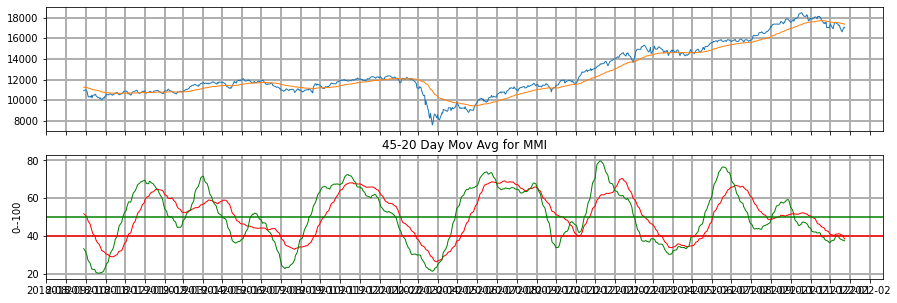

In [55]:
from matplotlib.dates import MonthLocator, YearLocator
t=800
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['45 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['20 Day'].values[:t],color= 'g',linewidth=1 )
ax[1].axhline(y=50 , color= 'g')
ax[1].axhline(y=40 , color= 'r')
plt.title('45-20 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)
plt.show()